1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [4]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("Total mean of m is:" , m.mean())
print("Mean of the columns:",np.mean(m,axis=0))
print("Mean of the rows:",np.mean(m,axis=1))

Total mean of m is: 5.5
Mean of the columns: [4. 5. 6. 7.]
Mean of the rows: [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [10]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

r = np.outer(u,v)
print(f"Using the function outer in numpy:\n{r}\n")


M = []
for i in u:
    row = []
    for j in v:
        row.append(i * j)
    M.append(row)
print(f"Using a nested for loop:\n{M}\n")


u_v =u * v.reshape(4,1)
print(f"Using numpy broadcasting operations:\n{u_v.transpose()}")

Using the function outer in numpy:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using a nested for loop:
[[2, 4, 6, 8], [6, 12, 18, 24], [10, 20, 30, 40], [14, 28, 42, 56]]

Using numpy broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [14]:
import numpy.random as npr
random = 3 * npr.random_sample((10, 6)) - 0
print("10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution: ")
print(random)
arr = np.array(random)
mask = (random < 0.3)
print("\nMask: \n", mask)
random[random < 0.3] = 0
print("\n All entries smaller than 3 set to zero  using a mask: ")
print(random)

10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution: 
[[0.58100695 0.52598082 1.97111802 2.02782597 2.93124891 1.91990693]
 [2.87230035 1.80672332 1.97035395 2.86544577 0.43520063 0.42954113]
 [0.27770231 0.85576859 0.73392074 0.62567406 1.05700892 0.09949028]
 [0.9507099  2.62259976 0.2603964  0.98346035 2.11953152 1.76303263]
 [1.237191   2.94103685 2.49108074 1.01903826 0.49844028 2.30721009]
 [1.25746462 2.46556794 0.25438987 0.51734045 2.53399318 0.78832007]
 [2.36794531 0.37443927 2.75450388 0.36183076 2.52605004 2.93240335]
 [1.94346611 1.77714999 2.17787787 2.17030908 2.16728658 1.55937771]
 [1.60779709 1.87796541 0.11250948 0.75508339 1.63365405 2.17059138]
 [0.05934845 2.75682453 1.63300237 2.08259683 2.29539916 0.07841663]]

Mask: 
 [[False False False False False False]
 [False False False False False False]
 [ True False False False False  True]
 [False False  True False False False]
 [False False False False False False]
 [

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

Array of 100 numbers between 0 and 2PI:
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5

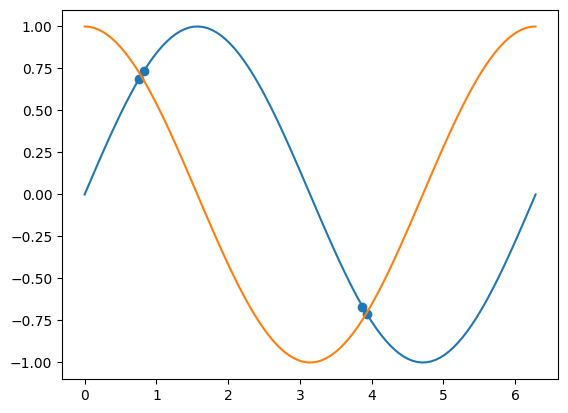

In [18]:
import math
import matplotlib.pyplot as plt

array1 = np.linspace(0,2*math.pi,100)
print(f"Array of 100 numbers between 0 and 2PI:\n{array1}")


new_array = array1[::10]
print("\n The elements that are in the 10th:\n",new_array)


reverse_new_array =new_array[::-1] 
print("\n Reversed elements that are in the 10th:\n",reverse_new_array)


x_x = np.abs(np.sin(array1)-np.cos(array1)) < 0.1
print("\nExtracted elemens in array:","\n",array1[x_x])


plt.scatter(array1[x_x], np.sin(array1[x_x]))
plt.plot(array1, np.sin(array1), array1, np.cos(array1));

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [23]:
import numpy as np
x = range(1,11) 
n = range(1,11)

mat = [[i*j for j in x] for i in n]
mat = np.array(mat)
print(f"The Matrix is:\n{mat}")


print("\nTrace of matrix:\n",np.trace(mat))


x = np.fliplr(mat).diagonal()
print("\nAnti-diagonal matrix:\n",x)


print("\nDiagonal offset by 1 upwards:\n",np.diagonal(mat,1))

The Matrix is:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of matrix:
 385

Anti-diagonal matrix:
 [10 18 24 28 30 30 28 24 18 10]

Diagonal offset by 1 upwards:
 [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [29]:
import matplotlib.pyplot as plt
import numpy as np
mile=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print("Distances in miles:\n",mile)
d= np.abs(mile-mile[:, np.newaxis])
print(f"\n2D grid of distances among each city along Route 66:\n{d}\n")
d_km = d*1.609344
print("2D grid of distances among each city along Route 66in km:\n" ,d_km.round(1))

Distances in miles:
 [   0  198  303  736  871 1175 1475 1544 1913 2448]

2D grid of distances among each city along Route 66:
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

2D grid of distances among each city along Route 66in km:
 [[   0.   318.7  487.6 1184.5 1401.7 1891.  2373.8 2484.8 3078.7 3939.7]
 [ 318.7    0.   169.   865.8 1083.1 1572.3 2055.1 2166.2 2760.  3621. ]
 [ 487.6  169.     0.   696.8  914.1 1403.3 1886.2 1997.2 2591.  3452. ]
 [1184.5  865.8  696.8    0.   217.3  706.5 1189.3 1300.3 1894.

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [30]:
import timeit

def SieveOfEratosthenes(n):
    prime = [True for i in range(n + 1)]
    p = 2
    while (p * p <= n):
        if (prime[p] == True):   
            for i in range(p ** 2, n + 1, p):
                prime[i] = False
        p += 1
    prime[0]= False
    prime[1]= False
    for p in range(n + 1):
        if prime[p]:
            print (p) 
            
#The performance of the program decreases when N increases and the time increases.
starttime = timeit.default_timer()
SieveOfEratosthenes(1000)
print("The time is:", timeit.default_timer() - starttime)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
The time is: 0.0011160419962834567


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[-1  1 -1 ... -1  1  1]
 [ 1  1 -1 ...  1  1 -1]
 [-1  1 -1 ...  1 -1  1]
 ...
 [ 1 -1  1 ...  1  1 -1]
 [ 1  1 -1 ... -1 -1  1]
 [-1 -1  1 ...  1  1 -1]]

 Walking distance for each walker:
 [  2 -12 -10  28  12 -18   2 -10  10  22 -12  14   2  -4   6   6  -6  -6
   4   4 -10   6 -20  12  22 -22 -32  26  16   4   8   0  -2  12  -2  -2
  26 -18  18  24   0   4  16 -36  -8  -8  -8  12  -2  -8 -14  22  -8   8
   4  18   8   0  14   0 -14  10   2 -18  -2   8  -6  12   6  22  -6 -16
 -34 -18 -20  10  12  -4  16   0 -12  10  12  12  18 -14   0   4   0  20
   0 -26 -12  18 -12   0  20  -4   8 -20 -32  12  14   6  -6   6 -30  -6
  10 -12  -4   6  -6 -12  -6   4  -6  22  -2  14  -4 -10  12  -6  24   0
 -12 -12  -6  20   0  12 -16  16   2 -20 -10 -16  12   2  -2 -12  20  14
   2  10 -10   0  -6  22   6   4   4 -16  10   2  14   2  -6  10   2 -12
  10  16   8  10  10  10 -12  -4   2  -8  -4 -22  16  16 -16  -8   2 -16
  20  22   2   4 -36 -24   8  10  20 -20   8  16  26   6  38  10   2 -22
   8

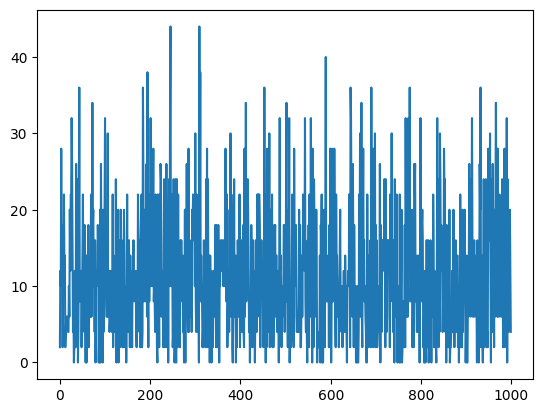

In [1]:
from pylab import *
u = 2 *randint(0, 2, size=(1000, 200))-1
print(u)
walking_distance = u.sum(1)
print("\n Walking distance for each walker:\n", u.sum(1))
walking_distances_square = np.square(walking_distance)
print("\n", walking_distances_square)
mean_distance_square = []
mean = 0
for i in walking_distances_square:
    mean += i
    mean_distance_square.append(np.mean(mean))
print("Mean:\n" , mean_distance_square)
distances = np.sqrt(walking_distances_square)
m = np.arange(0, len(distances))
plt.plot(m, distances)
plt.show()

